# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [308]:
print("Фиксируем сиды чтобы, если придется перезапустить отработку ячейки, результаты в ней были бы такими же. \nДля корректного сравнения отработки моделей.")

Фиксируем сиды чтобы, если придется перезапустить отработку ячейки, результаты в ней были бы такими же. 
Для корректного сравнения отработки моделей.


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

### Обзор данных

In [397]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [4]:
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [5]:
df_test.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [6]:
df_test.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [7]:
# all добавляет характеристики для категориальных значений:
# количество уникальных, самые частые и частота появления значений
df_train.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.000000,6.999000e+03,6.999000e+03,6999,6999,6999,6999,6797,6797,6803,6796,6797.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2013.818403,6.395152e+05,6.958462e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419008
std,NaN,4.053095,8.089419e+05,5.772400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965767
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [8]:
df_test.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,1000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,981,981,981,981,981.000000
unique,621,NaN,NaN,NaN,4,3,2,5,237,88,182,226,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,23,116,43,57,NaN
mean,NaN,2013.681000,6.179010e+05,71393.341000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.410805
std,NaN,4.012149,7.585539e+05,48486.218662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919985
min,NaN,1995.000000,3.100000e+04,1303.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
25%,NaN,2011.000000,2.500000e+05,37000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2014.000000,4.349990e+05,61500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.700000e+05,100000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

По строке count выше видно, что как в обучающей, так и в тестовой выборке есть пропуски в колонках:
- mileage
- engine
- max_power
- torque
- seats

Посмотрим на количество пропусков в этих колонках.

In [9]:
df_train.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

### Дубликаты

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [10]:
# Исключаем целевую переменную
df_train_wo_cost = df_train.drop('selling_price', axis=1)

In [11]:
df_train_wo_cost.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0


In [13]:
df_train[df_train.duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
326,Jaguar XF 2.0 Diesel Portfolio,2017,3200000,45000,Diesel,Dealer,Automatic,First Owner,19.33 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6880,Renault Captur 1.5 Diesel RXT,2018,1265000,12000,Diesel,Individual,Manual,First Owner,20.37 kmpl,1461 CC,108.45 bhp,240Nm@ 1750rpm,5.0
6881,Maruti Ciaz Alpha Diesel,2019,1025000,32000,Diesel,Individual,Manual,First Owner,28.09 kmpl,1248 CC,88.50 bhp,200Nm@ 1750rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [12]:
f'В обучающей выборке - {df_train.duplicated().sum()} дубликатов.'

'В обучающей выборке - 985 дубликатов.'

In [14]:
df_train_wo_cost[df_train_wo_cost.duplicated()]

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


Как видно из таблицы выше - 1159 дубликатов.

In [15]:
f'В обучающей выборке без целевой переменной - {df_train_wo_cost.duplicated().sum()} дубликатов.'

'В обучающей выборке без целевой переменной - 1159 дубликатов.'

Это значит, что 174 объекта имеют одинаковые значения признаков, но разную стоимость.

(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

Отображение в прошлом пункте.

In [17]:
# Соберем индексы дубликатов
idx_to_drop = df_train_wo_cost[df_train_wo_cost.duplicated()].index

(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

Для удаления дубликатов используется функция из pandas - drop_duplicates(). В ней есть параметр keep, который указывает на тот объект, у которого есть дубликаты. В задании сказано, что за такой объект считается первый упомянутый, поэтому в keep передадим значение 'first'.

In [18]:
# Один из способов
df_train_wo_cost.drop_duplicates(keep = 'first')

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6992,Hyundai Santro Xing GLS,2008,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
6993,Maruti Wagon R VXI BS IV with ABS,2013,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
6994,Hyundai i20 Magna,2013,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


In [455]:
# Удаление по индексам
df_train = df_train.drop(index=idx_to_drop)

In [456]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6992,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
6993,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


In [22]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [457]:
df_train = df_train.reset_index(drop=True)

In [458]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


### Преобразование числовых колонок

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

In [25]:
import re
import numpy as np

In [28]:
# Убираем единицы измерения
def find_num(strng):
    if re.search(r'\d+\.\d+', str(strng)):
        strng = re.findall(r'[0-9]*[.][0-9]+', strng)[0]
    elif re.search(r'\d+', str(strng)):
        strng = re.findall(r'\d+', strng)[0]
    else:
        strng = np.nan
        
    strng = float(strng)

    return strng

In [459]:
df_train['mileage'] = df_train['mileage'].apply(find_num)

In [460]:
df_test['mileage'] = df_test['mileage'].apply(find_num)

In [461]:
df_train['engine'] = df_train['engine'].apply(find_num)

In [37]:
df_test['engine'] = df_test['engine'].apply(find_num)

In [462]:
df_train['max_power'] = df_train['max_power'].apply(find_num)

In [42]:
df_test['max_power'] = df_test['max_power'].apply(find_num)

In [43]:
df_test.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
torque            object
seats            float64
dtype: object

In [463]:
df_train.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
torque            object
seats            float64
dtype: object

In [44]:
# Преобразованы mileage, engine, max_power
df_test

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.00,2498.0,112.00,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.50,1497.0,108.50,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.90,1799.0,130.00,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.10,1498.0,98.60,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.50,1172.0,65.00,96 Nm at 3000 rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81,1086.0,68.05,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.60,1197.0,81.83,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36,1197.0,78.90,111.8Nm@ 4000rpm,5.0


---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

В признаке torque встречаются:<br>
Nm - Ньютон на метр; <br>
rpm - обороты в минуту;<br>
kgm - килограмм на метр.<br>
1 kgm = 9.80665 Nm. <br>
Приведем значения к Nm.

In [47]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086.0,62.10,96.1Nm@ 3000rpm,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,90Nm@ 3500rpm,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.7Nm@ 4000rpm,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,"24@ 1,900-2,750(kgm@ rpm)",5.0


In [48]:
def find_torque(strng):
    
    if re.search(r'\bkgm\b', str(strng)):
        strng = float(re.findall(r'[\d]+[\.]?[\d]*', strng)[0]) * 9.8067
    elif re.search(r'[nN][mM]', str(strng)):
        strng = float(re.findall(r'[\d]+[\.]?[\d]*', strng)[0])
    else:
        strng = np.nan
    return strng

In [464]:
# Воспользуемся временным столбцом, куда запишем значения torque (Nm)
df_train['nt'] = df_train['torque'].apply(find_torque)

In [50]:
df_test['nt'] = df_test['torque'].apply(find_torque)

In [52]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,nt
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0,190.00000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0,250.00000
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0,219.67008
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,112.77705
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,113.75nm@ 4000rpm,5.0,113.75000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086.0,62.10,96.1Nm@ 3000rpm,5.0,96.10000
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,90Nm@ 3500rpm,5.0,90.00000
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.7Nm@ 4000rpm,5.0,113.70000
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,"24@ 1,900-2,750(kgm@ rpm)",5.0,235.36080


In [54]:
from statistics import mean

In [55]:
def find_max_torque(strng):
    if re.search(r'rpm\b', str(strng)):
        lst = re.findall(r'[\d]+[.,]?[\d]*', strng)
        if len(lst) == 2:
            strng = float(lst[1].replace(',', ''))
        else:
            lst = [float(i.replace(',', '')) for i in lst[1:]]
            strng = mean(lst)
    else:
        strng = np.nan
    return strng

In [465]:
# В max_torque запишем значения оборотов в минуту (rpm)
df_train['max_torque'] = df_train['torque'].apply(find_max_torque)

In [57]:
df_test['max_torque'] = df_test['torque'].apply(find_max_torque)

In [466]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,nt,max_torque
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0,190.00000,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0,250.00000,2000.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0,219.67008,2250.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,112.77705,4500.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,113.75nm@ 4000rpm,5.0,113.75000,4000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086.0,62.10,96.1Nm@ 3000rpm,5.0,96.10000,3000.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,90Nm@ 3500rpm,5.0,90.00000,3500.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.7Nm@ 4000rpm,5.0,113.70000,4000.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,"24@ 1,900-2,750(kgm@ rpm)",5.0,235.36080,2325.0


In [467]:
# Переприсвоим значения torque в соответствующий столбец и удалим временный
df_train['torque'] = df_train['nt']

In [63]:
df_test['torque'] = df_test['nt']

In [468]:
df_train.drop('nt', inplace=True, axis=1)

In [65]:
df_test.drop('nt', inplace=True, axis=1)

In [469]:
# Все преобразованные признаки теперь float
df_train.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
torque           float64
seats            float64
max_torque       float64
dtype: object

In [67]:
df_test.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
torque           float64
seats            float64
max_torque       float64
dtype: object

### Пропуски

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [68]:
df_train.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          186
engine           186
max_power        184
torque           231
seats            186
max_torque       213
dtype: int64

In [69]:
df_test.isnull().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           23
seats            19
max_torque       27
dtype: int64

In [71]:
from sklearn.impute import SimpleImputer

Поделим датасет на две части: одна с пропусками, другая без.

In [77]:
# train с пропусками
df_train_mis = df_train.loc[:, 'mileage':'max_torque']

In [78]:
# train без пропусков
df_train_no_mis = df_train.loc[:, 'name':'owner']

In [138]:
# test с пропусками
df_test_mis = df_test.loc[:, 'mileage':'max_torque']

In [139]:
df_test_mis

,mileage,engine,max_power,torque,seats,max_torque
0,14.00,2498.0,112.00,260.00000,7.0,2000.0
1,21.50,1497.0,108.50,260.00000,5.0,2125.0
2,12.90,1799.0,130.00,172.00000,5.0,4300.0
3,25.10,1498.0,98.60,200.00000,5.0,1750.0
4,16.50,1172.0,65.00,96.00000,5.0,3000.0
...,...,...,...,...,...,...
995,19.81,1086.0,68.05,99.04000,5.0,4500.0
996,18.60,1197.0,81.83,114.70000,5.0,4000.0
997,23.00,1396.0,90.00,219.67008,5.0,2250.0
998,20.36,1197.0,78.90,111.80000,5.0,4000.0


In [80]:
# test без пропусков
df_test_no_mis = df_test.loc[:, 'name':'owner']

In [140]:
df_test_no_mis

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner


In [141]:
imp = SimpleImputer(strategy='median')

In [142]:
# Вычисляем медиану по колонкам из train
imp.fit(df_train_mis)

SimpleImputer(strategy='median')

In [81]:
# Заполняем пропуски медианой в колонках train и преобразуем данные обратно в датафрейм
df_train_mis = pd.DataFrame(data=imp.transform(df_train_mis), columns=df_train_mis.columns)

In [87]:
# В обучающей выборке пропусков нет
df_train_mis.isnull().sum()

mileage       0
engine        0
max_power     0
torque        0
seats         0
max_torque    0
dtype: int64

In [143]:
# Заполняем пропуски медианой из train в колонках test
df_test_mis_upd = imp.transform(df_test_mis)

In [144]:
df_test_mis = pd.DataFrame(data=df_test_mis_upd, columns=df_test_mis.columns)

In [146]:
# В тестовых данных пропусков больше нет
df_test_mis.isnull().sum()

mileage       0
engine        0
max_power     0
torque        0
seats         0
max_torque    0
dtype: int64

In [470]:
# Горизонтально стыкуем две части
df_train = pd.concat([df_train_no_mis, df_train_mis], axis=1)

In [148]:
df_test_upd = pd.concat([df_test_no_mis, df_test_mis], axis=1)

In [149]:
df_test_upd

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.00,2498.0,112.00,260.00000,7.0,2000.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.50,1497.0,108.50,260.00000,5.0,2125.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.90,1799.0,130.00,172.00000,5.0,4300.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.10,1498.0,98.60,200.00000,5.0,1750.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.50,1172.0,65.00,96.00000,5.0,3000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81,1086.0,68.05,99.04000,5.0,4500.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.60,1197.0,81.83,114.70000,5.0,4000.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,219.67008,5.0,2250.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36,1197.0,78.90,111.80000,5.0,4000.0


### Корректировка типов


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [137]:
print("Возможно, оставляя переменную seats, как целочисленную, мы предполагаем, что количество сидений влияет на стоимость машины. Это отчасти правда, но если посмотреть на дисперсию цены при условии, что количество сидений одинаково, она достаточно большая. То есть не самый важный признак, который влияет на цену.")

Возможно, оставляя переменную seats, как целочисленную, мы предполагаем, что количество сидений влияет на стоимость машины. Это отчасти правда, но если посмотреть на дисперсию цены при условии, что количество сидений одинаково, она достаточно большая. То есть не самый важный признак, который влияет на цену.


In [471]:
df_train['engine'] = df_train['engine'].astype('int64')

In [472]:
df_train['seats'] = df_train['seats'].astype('int64')
df_train['max_torque'] = df_train['max_torque'].astype('int64')

In [150]:
df_test_upd['engine'] = df_test_upd['engine'].astype('int64')

In [152]:
df_test_upd['seats'] = df_test_upd['seats'].astype('int64')
df_test_upd['max_torque'] = df_test_upd['max_torque'].astype('int64')

In [153]:
# Проверка
df_test_upd.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine             int64
max_power        float64
torque           float64
seats              int64
max_torque         int64
dtype: object

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

In [119]:
import seaborn as sns

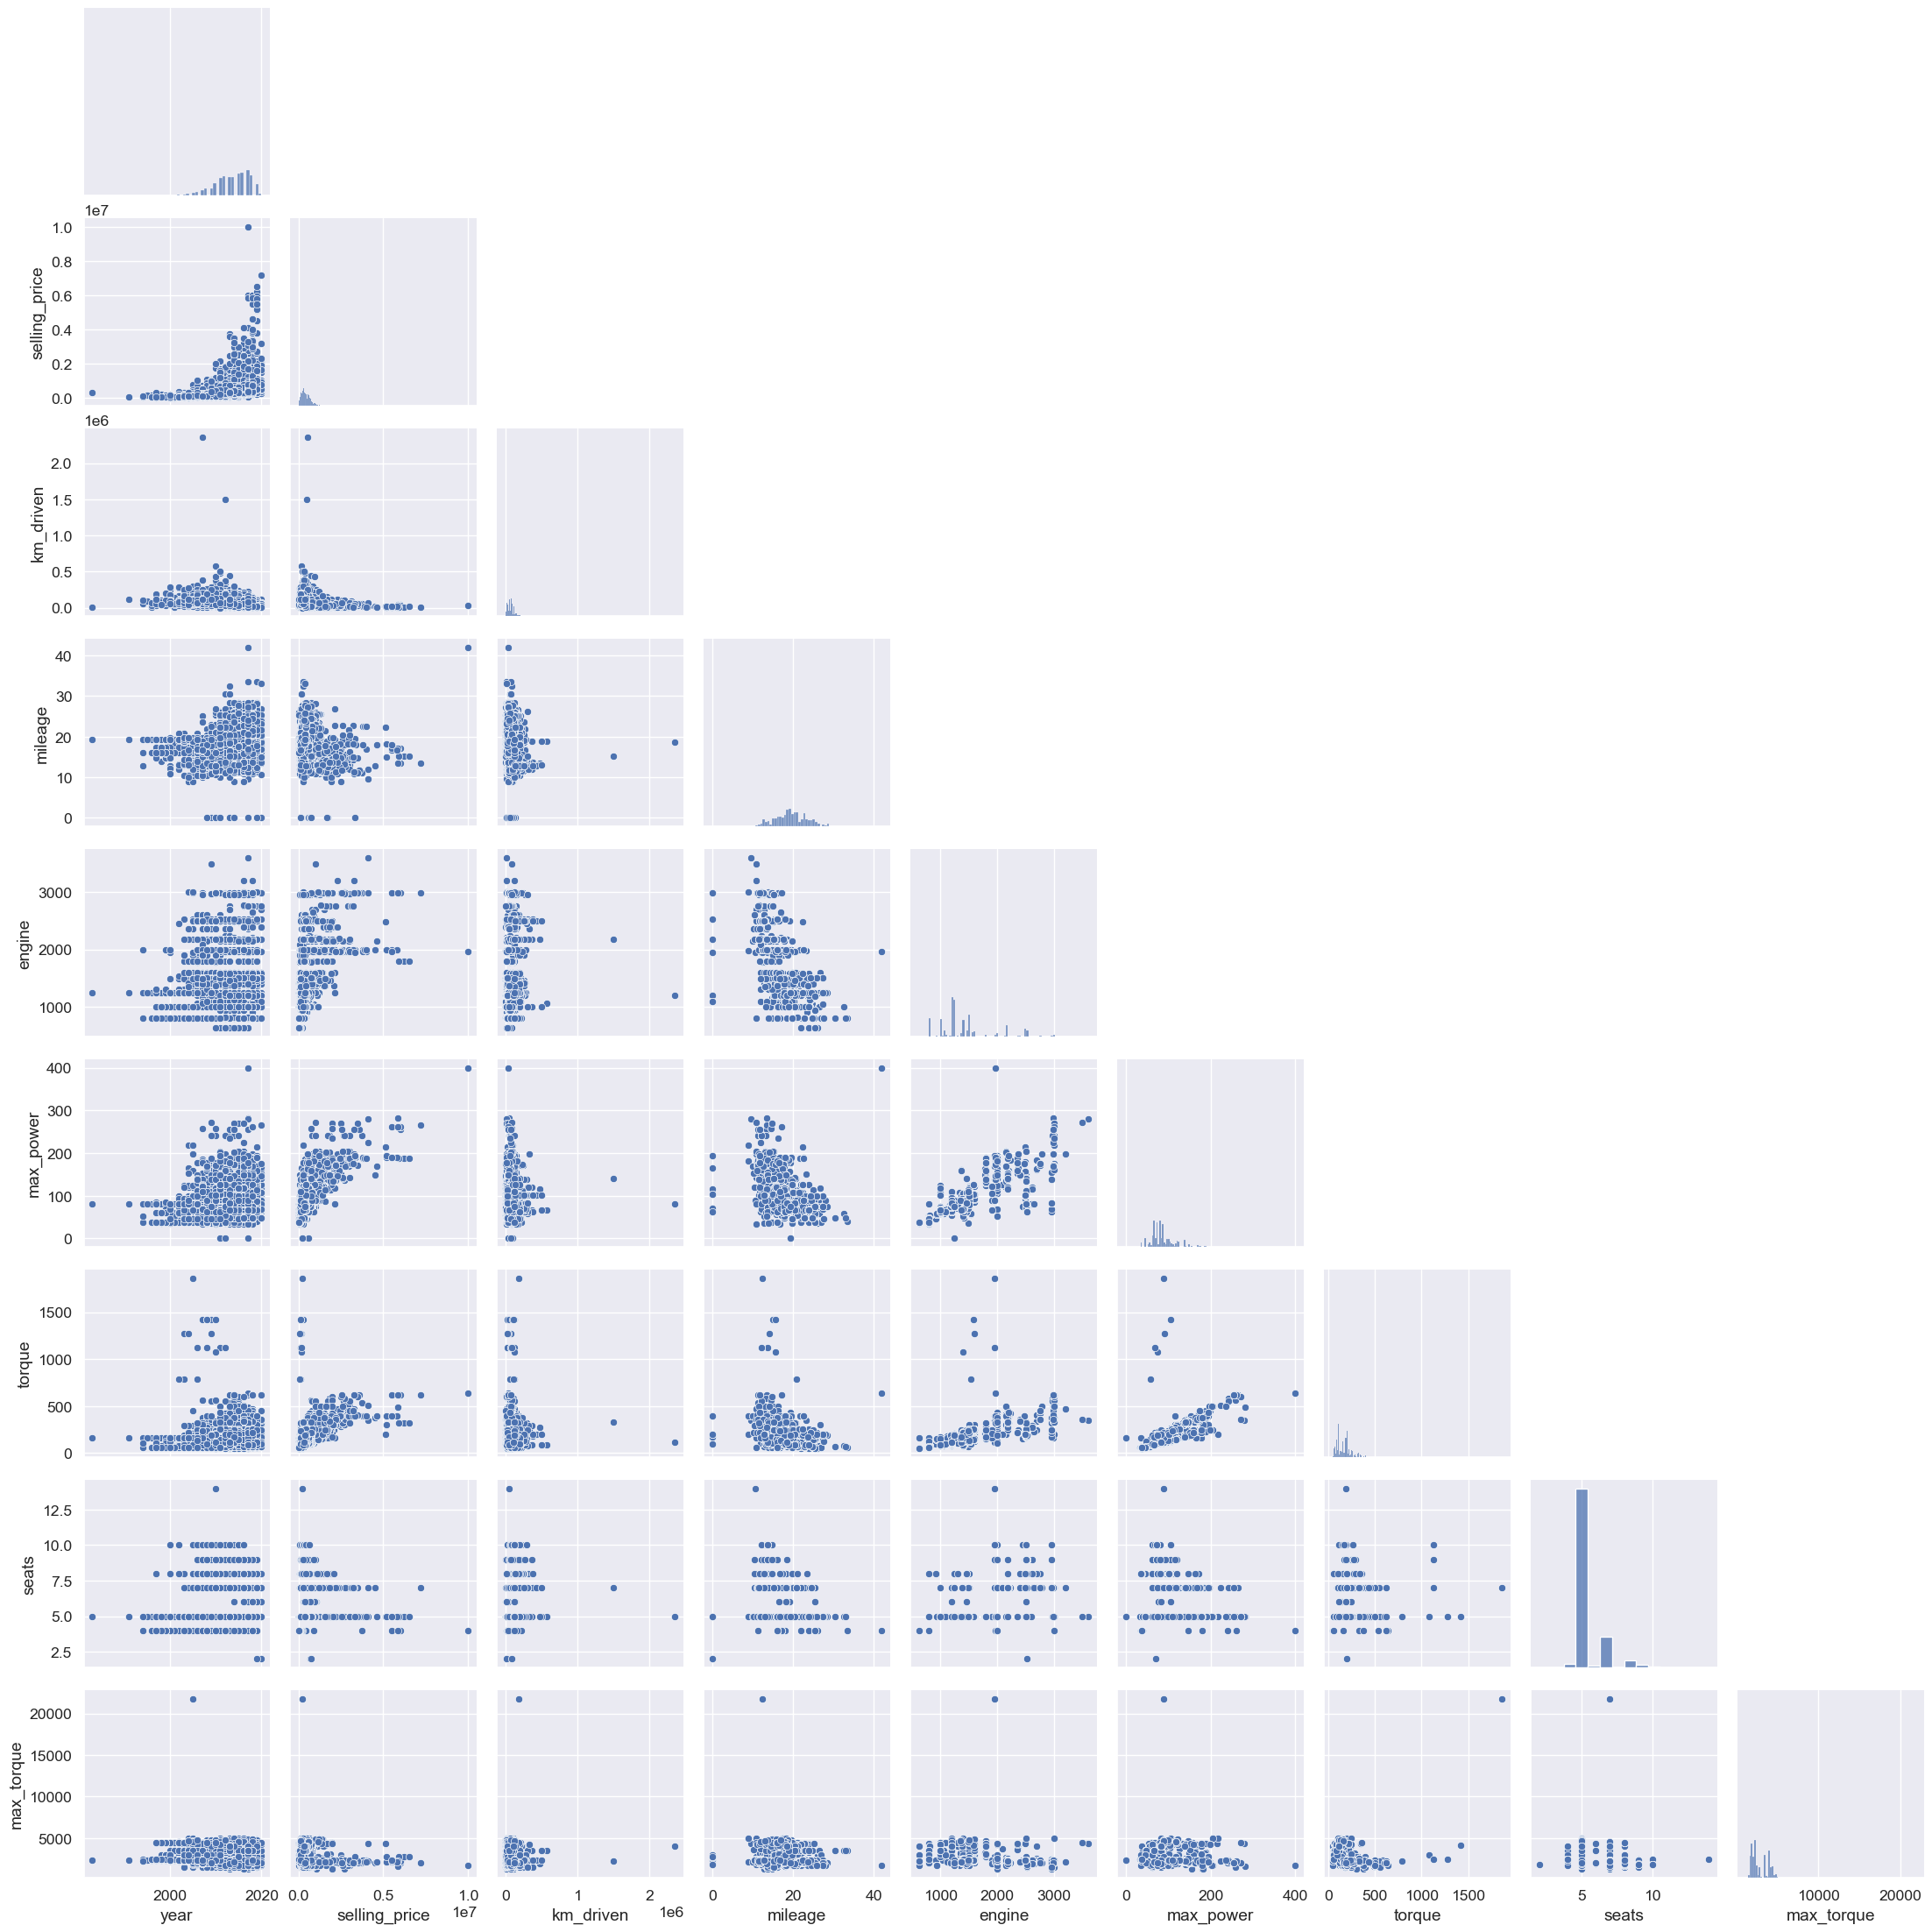

In [280]:
sns.set(font_scale=1.15)
sns.pairplot(data = df_train, corner = True);

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.


* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?</font><br>

    selling_price - year: зависимость похожа на квадратичную;<br>
    selling_price - max_power: предположительно линейная зависимость.
    
    
* <font color='#FF6600'> А о корреляциях признаков? </font><br>

    Положительная корреляция:
        engine - max_power: линейная зависимость, возрастает один - возрастает и второй;
        torque - max_power;
        torque - engine;
    Отрицательная корреляция:
        mileage - max_power: обратная линейная зависимость, возрастает один - убывает второй;
        mileage - engine;
        mileage - seats.

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

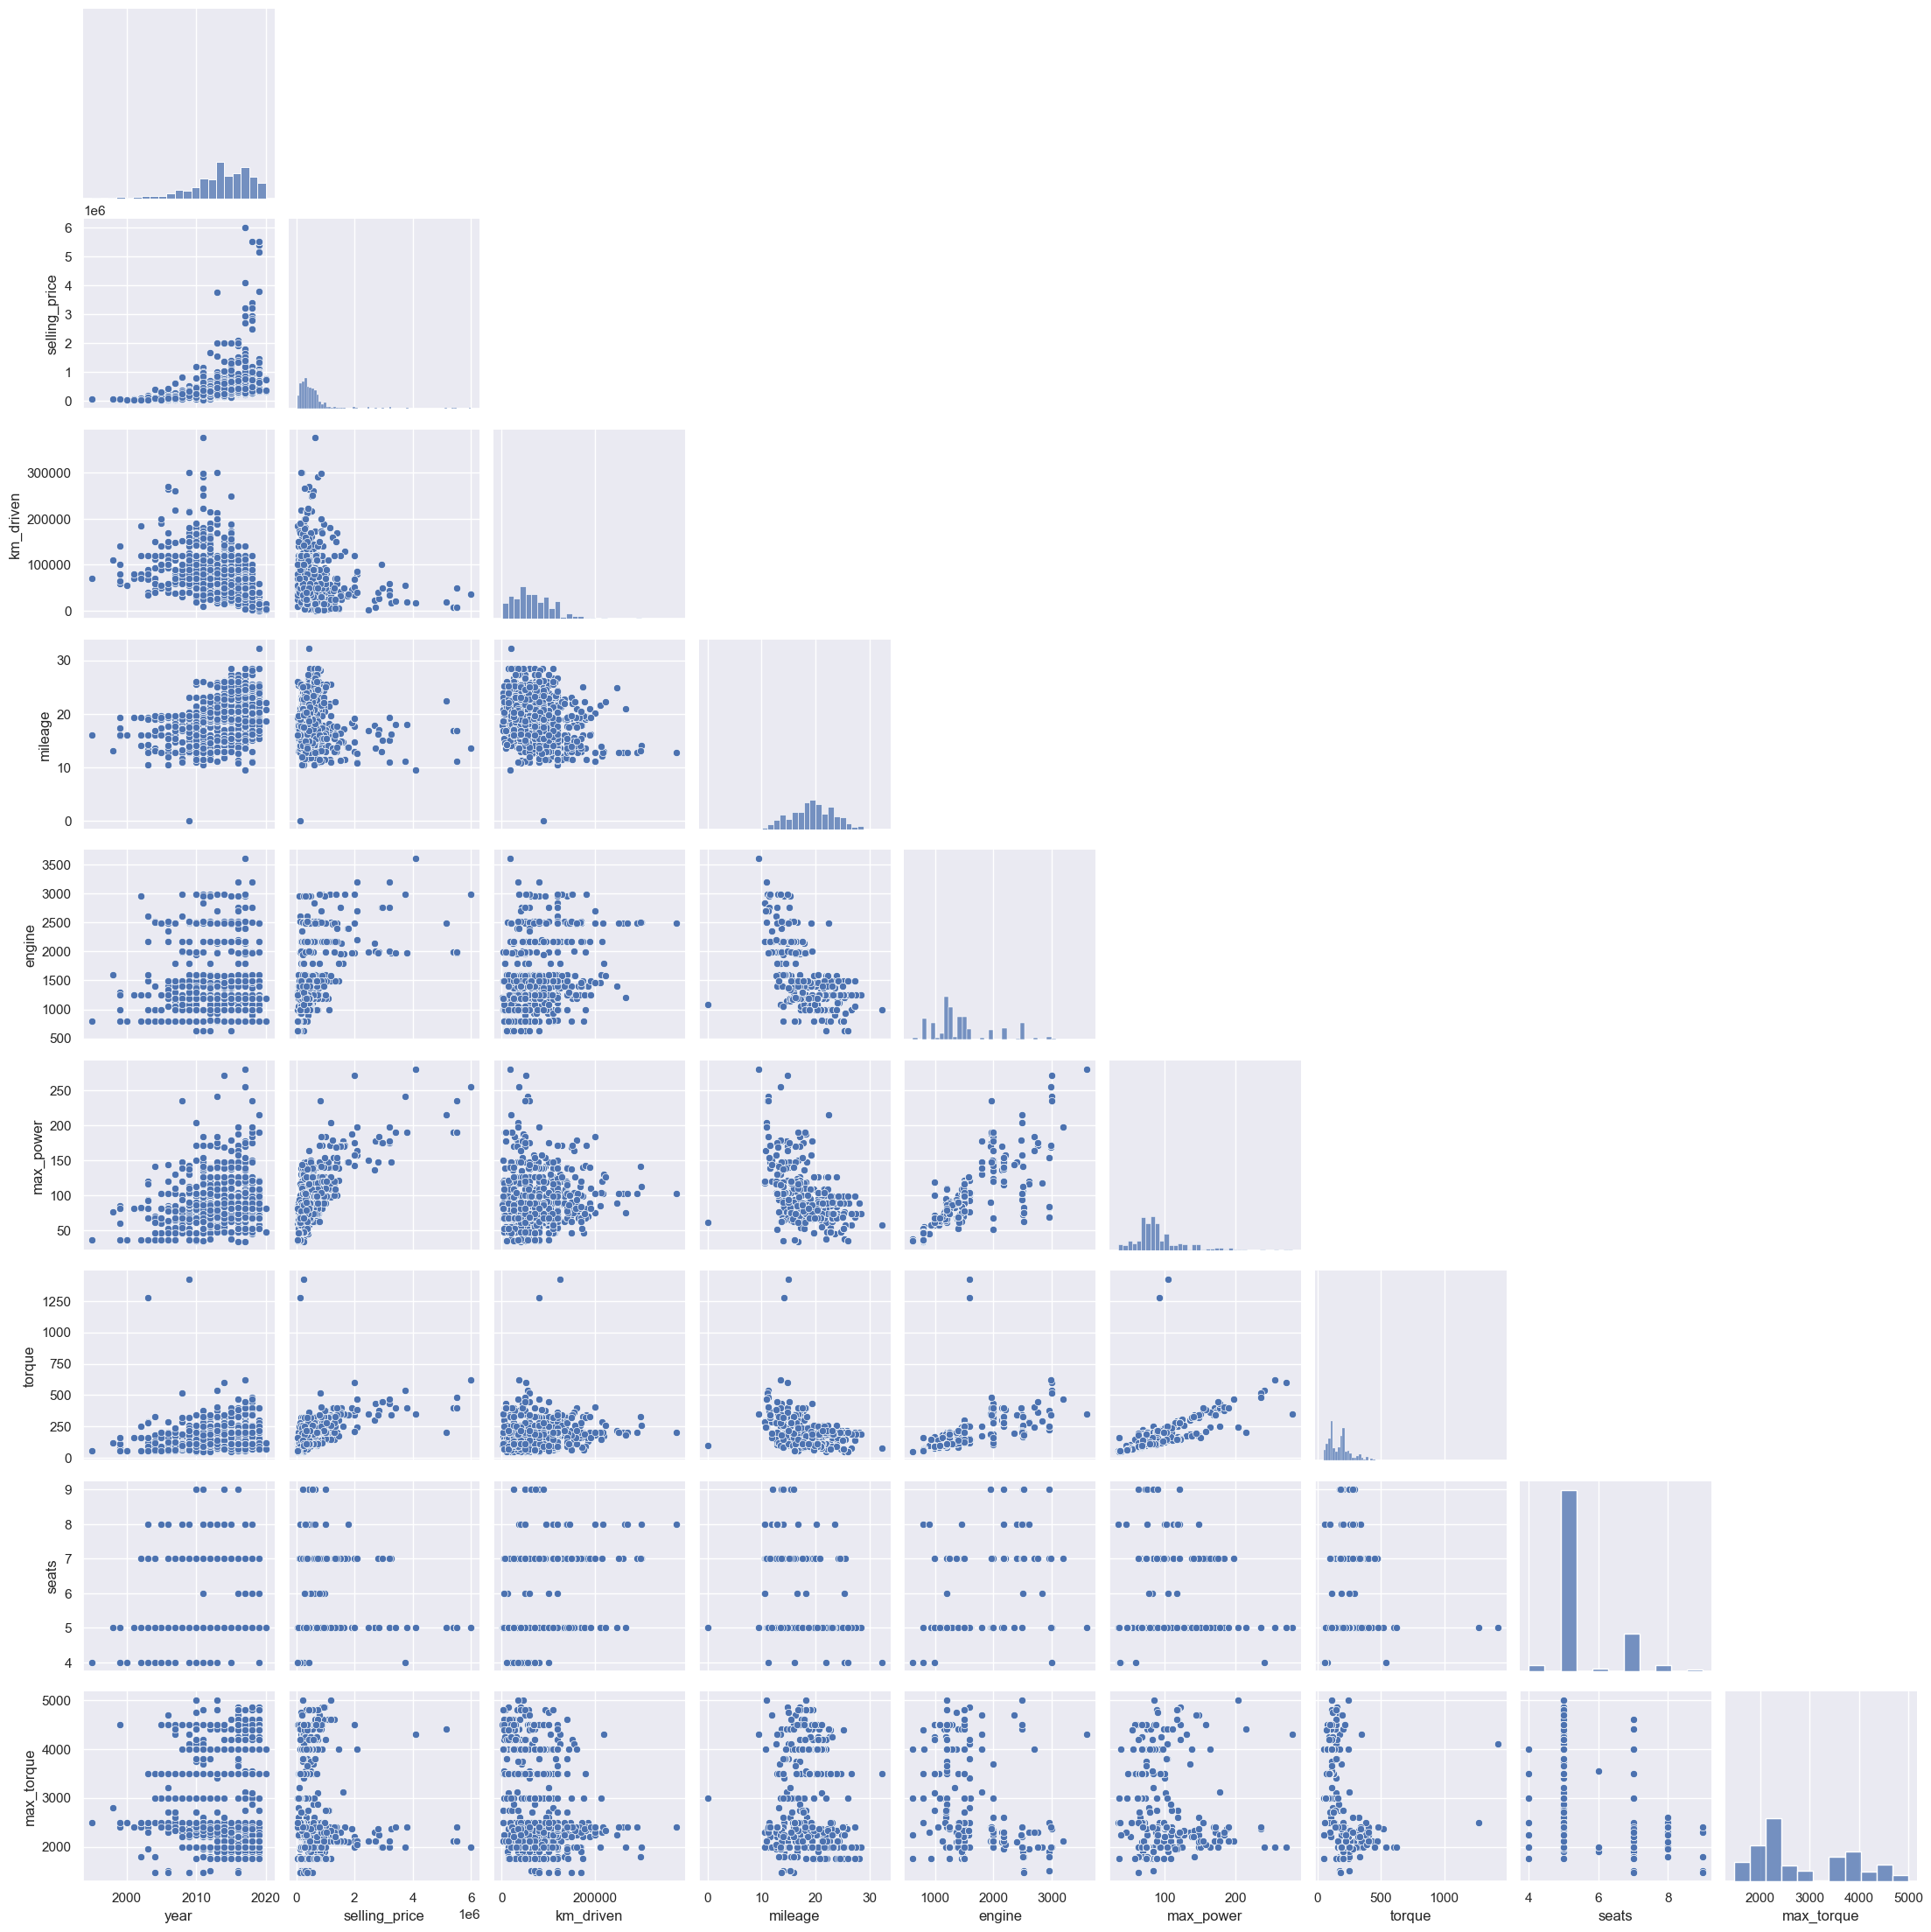

In [400]:
sns.pairplot(df_test_upd, corner = True);

В тесте меньше выбросов данных, это видно, например, из распределения признака max_torque с другими. Значения max_torque на тесте не выше 5k, а в трейне есть и по 20k, хотя незначительное количество.<br>
В основном, если делать вывод, то похожи.

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

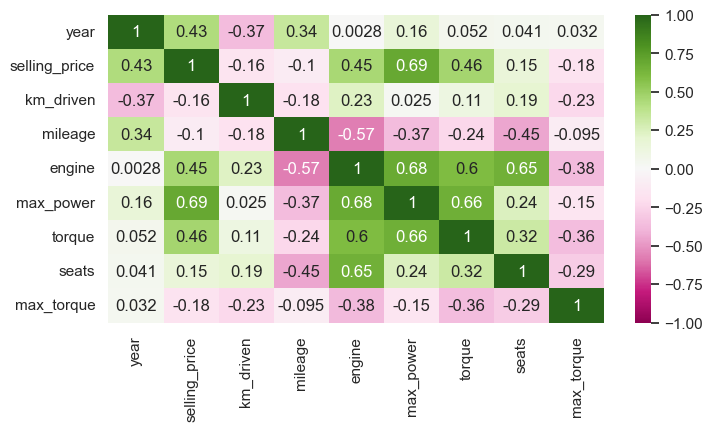

In [525]:
plt.figure(figsize=(8,4))
sns.heatmap(df_train.corr(), cmap='PiYG', annot=True, vmin=-1, vmax=1);

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font><br>
Наименьшая корреляция наблюдается у признаков год (year) и кубатура двигателя (engine), она близка к нулю, значит признаки не зависят друг от друга.
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font><br>
Это мощность (max_power) и стоимость (selling_price); мощность (max_power) и кубатура двигателя (engine); мощность (max_power) и крутящий момент (torque); кубатура двигателя (engine) и кол-во сидений (seats).
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font><br>
Судя по тепловой карте, корреляция признаков = 0.34. Это величина слабой положительной корреляции, поэтому утвержать вышесказанное не правильно. Была бы корреляция, равная, например, 0.75, я бы сказала, что, <font color='#FF0000'>скорее всего</font> (это важная часть оценки), чем меньше год, тем больше километров.

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

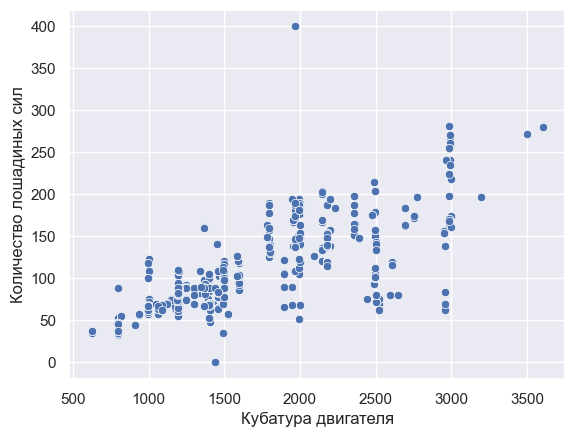

In [130]:
sns.scatterplot(x='engine', y='max_power', data=df_train)

plt.xlabel('Кубатура двигателя')

plt.ylabel('Количество лошадиных сил');

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

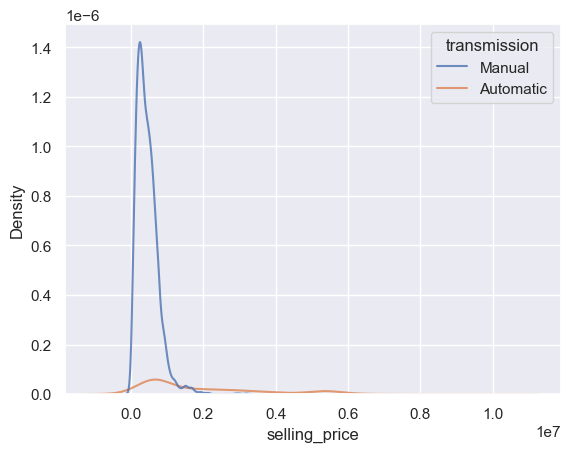

In [434]:
# Плотность распределения цены в зависимости от коробки передач
sns.kdeplot(data=df_train, x = 'selling_price', hue='transmission', alpha = 0.8);

На МКПП стоимость держится примерно в одном интервале, тогда как на АКПП сильно варьируется.

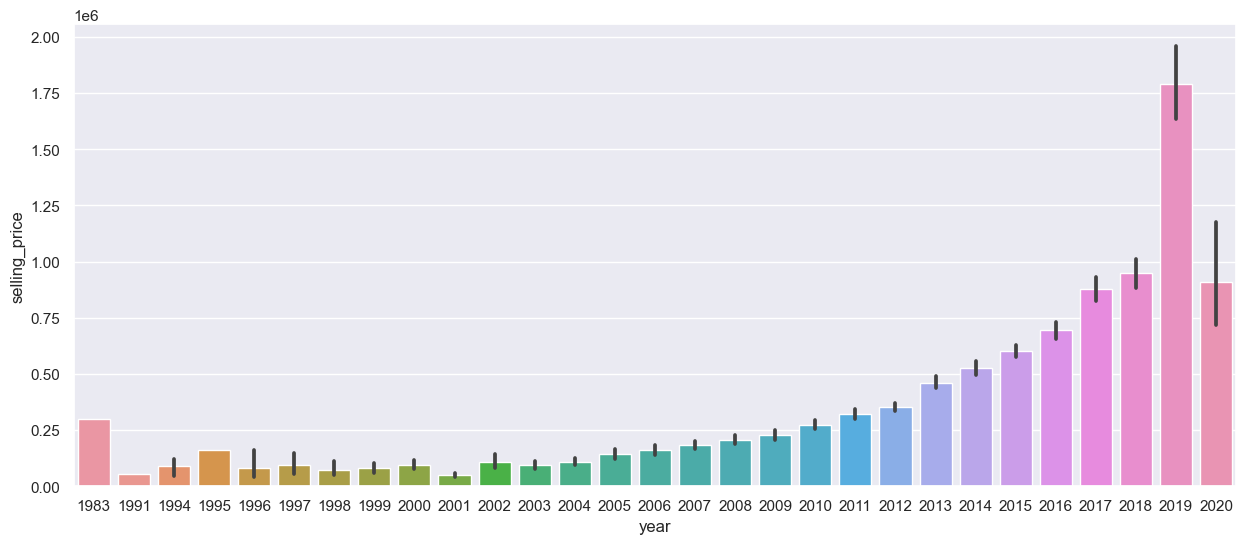

In [423]:
# Посмотрим на стоимость машин по годам в среднем
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x='year', y='selling_price', data=df_train, ax=ax);

Был виден возрастающий тренд, но в 2020 году (скорее всего из-за одного из драйверов - пандемия) резкое снижение.

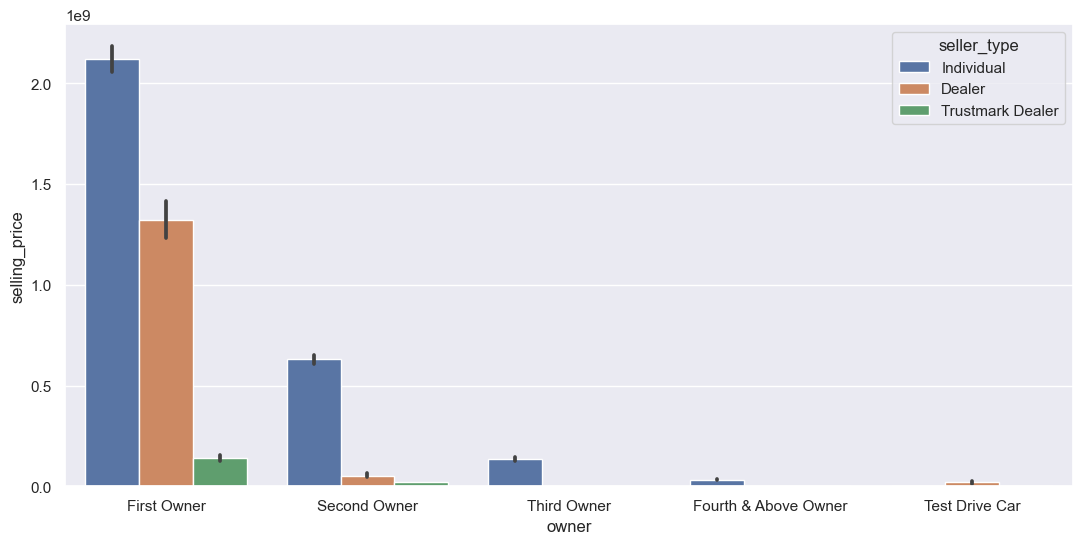

In [430]:
# Посмотрим на продажи машин в зависимости от номера владельца
fig, ax = plt.subplots(figsize=(13, 6))
sns.barplot(data=df_train, x='owner', y='selling_price', hue='seller_type', estimator=sum, ax=ax);

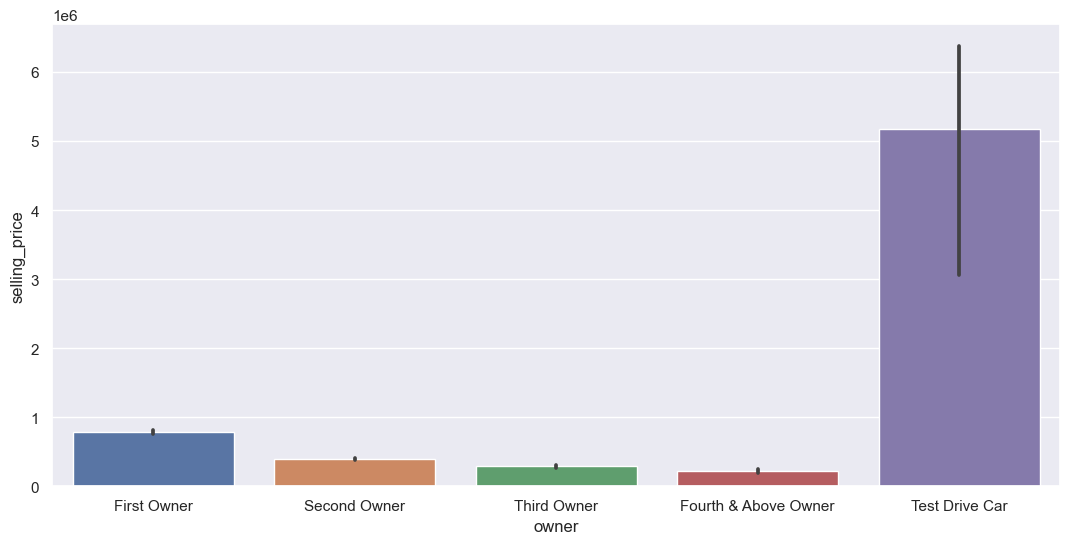

In [431]:
# Зато если смотреть по средней стоимости
fig, ax = plt.subplots(figsize=(13, 6))
sns.barplot(data=df_train, x='owner', y='selling_price', ax=ax);

In [426]:
# "Премиальные" машины в классе Test Drive Car
df_train[df_train['owner'] == 'Test Drive Car']

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
4230,Audi A6 35 TFSI Matrix,2019,6223000,7800,Petrol,Dealer,Automatic,Test Drive Car,15.26 kmpl,1798 CC,187.74 bhp,320Nm@ 1400-4100rpm,5.0
4231,Audi A6 35 TFSI Matrix,2019,5923000,11500,Petrol,Dealer,Automatic,Test Drive Car,15.26 kmpl,1798 CC,187.74 bhp,320Nm@ 1400-4100rpm,5.0
4232,Audi A6 35 TFSI Matrix,2019,6523000,23600,Petrol,Dealer,Automatic,Test Drive Car,15.26 kmpl,1798 CC,187.74 bhp,320Nm@ 1400-4100rpm,5.0
5340,Honda Civic ZX,2019,2000000,24857,Petrol,Dealer,Automatic,Test Drive Car,16.5 kmpl,1799 CC,139.46 bhp,174Nm@ 4300rpm,5.0


# Часть 2 (1.25 балла) | Модель только на вещественных признаках

### Присвоение X, y

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [103]:
df_train_no_target = df_train.drop('selling_price', axis=1)

In [120]:
# Создадим маску для выявления numeric столбцов
num_features_mask = (df_train_no_target.dtypes == 'int64').values | (df_train_no_target.dtypes == 'float64').values

In [119]:
# Отфильтровали df_train, оставив только числовые признаки
df_train_no_target[df_train_no_target.columns[num_features_mask]]

,year,km_driven,mileage,engine,max_power,torque,seats,max_torque
0,2014,145500,23.40,1248,74.00,190.00000,5,2000
1,2014,120000,21.14,1498,103.52,250.00000,5,2000
2,2010,127000,23.00,1396,90.00,219.67008,5,2250
3,2007,120000,16.10,1298,88.20,112.77705,5,4500
4,2017,45000,20.14,1197,81.86,113.75000,5,4000
...,...,...,...,...,...,...,...,...
5835,2008,191000,17.92,1086,62.10,96.10000,5,3000
5836,2013,50000,18.90,998,67.10,90.00000,5,3500
5837,2013,110000,18.50,1197,82.85,113.70000,5,4000
5838,2007,119000,16.80,1493,110.00,235.36080,5,2325


In [121]:
y_train = df_train['selling_price']
X_train = df_train_no_target[df_train_no_target.columns[num_features_mask]]

In [124]:
# assert X_train.shape == (5840, 6)
# Признаков на 2 больше, чем заданных, тк оставлен столбец torque и разделен на два
assert X_train.shape == (5840, 8)

In [154]:
df_test_upd

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.00,2498,112.00,260.00000,7,2000
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.50,1497,108.50,260.00000,5,2125
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.90,1799,130.00,172.00000,5,4300
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.10,1498,98.60,200.00000,5,1750
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.50,1172,65.00,96.00000,5,3000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81,1086,68.05,99.04000,5,4500
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.60,1197,81.83,114.70000,5,4000
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,219.67008,5,2250
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36,1197,78.90,111.80000,5,4000


In [155]:
df_test_no_target = df_test_upd.drop('selling_price', axis=1)

In [158]:
y_test = df_test_upd['selling_price']
X_test = df_test_no_target[df_test_no_target.columns[num_features_mask]]

In [159]:
assert X_test.shape == (1000, 8)

### LinearRegression

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [160]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model_lr = LinearRegression()

model_lr.fit(X_train, y_train)

LinearRegression()

In [161]:
y_pred = model_lr.predict(X_test)

In [162]:
MSE(y_test, y_pred)

230204737757.53125

In [165]:
MSE(y_test, y_pred) ** 0.5

479796.55871789163

In [163]:
r2_score(y_test, y_pred)

0.5995245269229015

In [166]:
MSE(y_train, model_lr.predict(X_train))

114196730669.1063

In [167]:
MSE(y_train, model_lr.predict(X_train)) ** 0.5

337930.06771979656

In [168]:
r2_score(y_train, model_lr.predict(X_train))

0.6015999418524249

In [169]:
model_lr.coef_

array([ 4.05082215e+04, -8.28814644e-01, -2.52420091e+03,  3.36720793e+01,
        1.02414477e+04,  7.93559866e+01, -3.30549165e+04, -6.46709096e+01])

### StandardScaler

Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [179]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler().fit(X_train)

In [182]:
X_train_scaled = pd.DataFrame(data=scale.transform(X_train), columns=X_train.columns)

In [184]:
X_test_scaled = pd.DataFrame(data=scale.transform(X_test), columns=X_test.columns)

In [185]:
X_test_scaled

,year,km_driven,mileage,engine,max_power,torque,seats,max_torque
0,-0.837167,1.565740,-1.362605,2.200379,0.761548,0.791734,1.601702,-0.870340
1,0.872122,-0.814974,0.519155,0.139102,0.650920,0.791734,-0.434419,-0.741845
2,-1.569719,2.405866,-1.638596,0.760986,1.330489,-0.031788,-0.434419,1.493982
3,0.383754,1.648982,1.422399,0.141162,0.338003,0.230242,-0.434419,-1.127332
4,-0.592983,-0.065798,-0.735352,-0.530144,-0.724021,-0.743012,-0.434419,0.157626
...,...,...,...,...,...,...,...,...
995,-1.325535,0.433652,0.095132,-0.707236,-0.627617,-0.714563,-0.434419,1.699575
996,0.872122,-0.398765,-0.208459,-0.478663,-0.192061,-0.568013,-0.434419,1.185592
997,-1.081351,-0.565249,0.895506,-0.068879,0.066175,0.414319,-0.434419,-0.613349
998,-0.348799,-0.814974,0.233127,-0.478663,-0.284672,-0.595152,-0.434419,1.185592


In [174]:
model_lr_scaled = LinearRegression()

model_lr_scaled.fit(X_train_scaled, y_train)

LinearRegression()

In [186]:
y_pred_scaled = model_lr_scaled.predict(X_test_scaled)

In [187]:
MSE(y_test, y_pred_scaled)

230204737757.53143

In [188]:
MSE(y_test, y_pred_scaled) ** 0.5

479796.55871789186

In [189]:
r2_score(y_test, y_pred_scaled)

0.5995245269229011

In [190]:
r2_score(y_train, model_lr_scaled.predict(X_train_scaled))

0.6015999418524249

In [191]:
model_lr_scaled.coef_

array([165892.1561274 , -49783.57478808, -10060.53564192,  16351.87726531,
       324015.9456063 ,   8479.82772668, -32468.51701355, -62911.51141629])

Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

Судя по весам, наибольший у признака max_power. Как и в heatmap, мы видим, что между max_power и таргетом наибольшая корреляция.

### MinMaxScaler

Воспользуемся MinMaxScaler вместо StandardScaler.

In [192]:
from sklearn.preprocessing import MinMaxScaler 
scale_features_mm = MinMaxScaler() 
features_train = scale_features_mm.fit_transform(X_train) 
features_test = scale_features_mm.transform(X_test) 

In [194]:
X_train_mm = pd.DataFrame(data=features_train, columns=X_train.columns)

In [195]:
X_train_mm

,year,km_driven,mileage,engine,max_power,torque,seats,max_torque
0,0.837838,0.061640,0.557143,0.209396,0.185000,0.078225,0.25,0.035605
1,0.837838,0.050837,0.503333,0.293289,0.258800,0.111278,0.25,0.035605
2,0.729730,0.053803,0.547619,0.259060,0.225000,0.094570,0.25,0.047781
3,0.648649,0.050837,0.383333,0.226174,0.220500,0.035684,0.25,0.157372
4,0.918919,0.019064,0.479524,0.192282,0.204650,0.036220,0.25,0.133018
...,...,...,...,...,...,...,...,...
5835,0.675676,0.080916,0.426667,0.155034,0.155250,0.026497,0.25,0.084312
5836,0.810811,0.021182,0.450000,0.125503,0.167750,0.023137,0.25,0.108665
5837,0.810811,0.046601,0.440476,0.192282,0.207125,0.036193,0.25,0.133018
5838,0.648649,0.050414,0.400000,0.291611,0.275000,0.103214,0.25,0.051434


In [197]:
X_test_mm = pd.DataFrame(data=features_test, columns=X_test.columns)
X_test_mm

,year,km_driven,mileage,engine,max_power,torque,seats,max_torque
0,0.729730,0.071172,0.333333,0.628859,0.280000,0.116787,0.416667,0.035605
1,0.918919,0.010591,0.511905,0.292953,0.271250,0.116787,0.250000,0.041693
2,0.648649,0.092551,0.307143,0.394295,0.325000,0.068309,0.250000,0.147630
3,0.864865,0.073290,0.597619,0.293289,0.246500,0.083734,0.250000,0.023428
4,0.756757,0.029655,0.392857,0.183893,0.162500,0.026442,0.250000,0.084312
...,...,...,...,...,...,...,...,...
995,0.675676,0.042364,0.471667,0.155034,0.170125,0.028117,0.250000,0.157372
996,0.918919,0.021182,0.442857,0.192282,0.204575,0.036744,0.250000,0.133018
997,0.702703,0.016945,0.547619,0.259060,0.225000,0.094570,0.250000,0.047781
998,0.783784,0.010591,0.484762,0.192282,0.197250,0.035146,0.250000,0.133018


### Lasso

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [198]:
from sklearn.linear_model import Lasso

model_l1 = Lasso(alpha=1)

model_l1.fit(X_train_mm, y_train)

pred_l1 = model_l1.predict(X_test_mm)

r2_score(y_test, pred_l1)

0.5995032784807341

In [495]:
MSE(y_test, pred_l1) ** 0.5

479809.2870806607

In [199]:
r2_score(y_train, model_l1.predict(X_train_mm))

0.6015999279877879

In [494]:
MSE(y_train, model_l1.predict(X_train_mm)) ** 0.5

337930.0735999133

In [200]:
print(model_l1.coef_)

[ 1498701.11114125 -1954523.71521968  -105517.41680104   100380.10769598
  4096701.92208089   143786.63416774  -396206.29024313 -1326791.12276198]


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

L1-регуляризация не занулила веса с параметром alpha=1. Параметр оказался маленьким. Если рассматривать это с точки зрения картинки с ромбом (значениями регуляризации) и кругами (значениями предсказания), то пересечение этих фигур произошло не в вершинах ромба, которые лежат попарно на осях Х и Y, а на сторонах ромба.

### Lasso + GridSearchCV

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [507]:
from sklearn.model_selection import GridSearchCV

params = {'alpha' : np.linspace(100, 500, 200)}

gs_lasso = GridSearchCV(Lasso(), params,  scoring='neg_root_mean_squared_error', cv=10)

gs_lasso.fit(X_train_mm, y_train)

gs_lasso.best_score_, gs_lasso.best_estimator_

(-332073.1317354101, Lasso(alpha=483.9195979899497))

In [514]:
r2_score(y_train, model_lasso_gs.predict(X_train_mm))

0.5989539246267079

In [508]:
model_lasso_gs = gs_lasso.best_estimator_

In [509]:
y_pred_lasso_gs = model_lasso_gs.predict(X_test_mm)

In [510]:
MSE(y_test, y_pred_lasso_gs) ** 0.5

486417.801431972

In [513]:
r2_score(y_test, y_pred_lasso_gs)

0.5883950523523898

<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

Столько же, сколько и параметров было задано для перебора. Я задала 200, поэтому GridSearch обучил 200 моделей.

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [511]:
f'Коэффициент регуляризации у лучшей из перебранных моделей: {gs_lasso.best_params_}'

"Коэффициент регуляризации у лучшей из перебранных моделей: {'alpha': 483.9195979899497}"

In [512]:
gs_lasso.best_estimator_.coef_

array([ 1494339.17833545, -1038440.60638533,        0.        ,
          77433.5829539 ,  4134473.90232584,    33435.31132692,
        -214160.70014966,  -955991.36634557])

Наконец-то занулился третий вес! (признак mileage)

### ElasticNet

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [239]:
from sklearn.linear_model import ElasticNet

params = {'alpha' : np.arange(0.00001, 1.00001, 0.0001)}

gs_el_net = GridSearchCV(ElasticNet(), params,  scoring='neg_root_mean_squared_error', cv=10)

gs_el_net.fit(X_train_mm, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': array([1.0000e-05, 1.1000e-04, 2.1000e-04, ..., 9.9971e-01, 9.9981e-01,
       9.9991e-01])},
             scoring='neg_root_mean_squared_error')

<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [515]:
print(f'Лучшая модель, полученная в результате работы GridSearch, имеет гиперпараметр: {gs_el_net.best_params_}. \nОшибка при таком alpha на тренировочных данных составила {gs_el_net.best_score_} (руб./дол.) \nПоказатель практически не отличается от скора, полученного применением Lasso ({gs_lasso.best_score_}).')

Лучшая модель, полученная в результате работы GridSearch, имеет гиперпараметр: {'alpha': 0.0006100000000000001}. 
Ошибка при таком alpha на тренировочных данных составила -331125.4216837723 (руб./дол.) 
Показатель практически не отличается от скора, полученного применением Lasso (-332073.1317354101).


In [522]:
r2_score(y_train, model_el_net.predict(X_train_mm))

0.5988129381886447

In [518]:
model_el_net = gs_el_net.best_estimator_

In [519]:
y_pred_el_net = model_el_net.predict(X_test_mm)

In [521]:
MSE(y_test, y_pred_el_net) ** 0.5

488171.7906337503

In [523]:
r2_score(y_test, y_pred_el_net)

0.5854212619867558

Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.75 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [473]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190.00000,5,2000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250.00000,5,2000
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,219.67008,5,2250
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,112.77705,5,4500
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,113.75000,5,4000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086,62.10,96.10000,5,3000
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,90.00000,5,3500
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,113.70000,5,4000
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,235.36080,5,2325


In [474]:
X_train_cat = df_train.drop(['name', 'selling_price'], axis=1)

In [475]:
assert X_train_cat.shape == (5840, 12)

In [255]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


### OHE

(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [476]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

X_dum = pd.get_dummies(X_train_cat,columns=['fuel', 'seller_type', 'transmission', 'owner'], drop_first=True)
print(X_dum.shape)
X_dum.head()

(5840, 18)


,year,km_driven,mileage,engine,max_power,torque,seats,max_torque,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,145500,23.40,1248,74.00,190.00000,5,2000,1,0,0,1,0,1,0,0,0,0
1,2014,120000,21.14,1498,103.52,250.00000,5,2000,1,0,0,1,0,1,0,1,0,0
2,2010,127000,23.00,1396,90.00,219.67008,5,2250,1,0,0,1,0,1,0,0,0,0
3,2007,120000,16.10,1298,88.20,112.77705,5,4500,0,0,1,1,0,1,0,0,0,0
4,2017,45000,20.14,1197,81.86,113.75000,5,4000,0,0,1,1,0,1,0,0,0,0


### Ridge + GridSearchCV

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [481]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

params = {'alpha' : np.linspace(0.1, 10.1, 200)}

gs_ridge_r2 = GridSearchCV(Ridge(), params,  scoring='r2', cv=10)

gs_ridge_r2.fit(X_dum, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([ 0.1       ,  0.15025126,  0.20050251,  0.25075377,  0.30100503,
        0.35125628,  0.40150754,  0.45175879,  0.50201005,  0.55226131,
        0.60251256,  0.65276382,  0.70301508,  0.75326633,  0.80351759,
        0.85376884,  0.9040201 ,  0.95427136,  1.00452261,  1.05477387,
        1.10502513,  1.15527638,  1.20552764,  1.25577889,  1.30603015,
        1.35628141,  1.406532...
        8.39145729,  8.44170854,  8.4919598 ,  8.54221106,  8.59246231,
        8.64271357,  8.69296482,  8.74321608,  8.79346734,  8.84371859,
        8.89396985,  8.94422111,  8.99447236,  9.04472362,  9.09497487,
        9.14522613,  9.19547739,  9.24572864,  9.2959799 ,  9.34623116,
        9.39648241,  9.44673367,  9.49698492,  9.54723618,  9.59748744,
        9.64773869,  9.69798995,  9.74824121,  9.79849246,  9.84874372,
        9.89899497,  9.94924623,  9.99949749, 10.04974874, 10.1       ])},
             scoring='r2')

In [482]:
# r2 и лучшая модельна тестовых данных
gs_ridge_r2.best_score_, gs_ridge_r2.best_estimator_

(0.6142623433370271, Ridge(alpha=7.135175879396985))

In [445]:
# Закодируем тестовые данные
X_test_cat = df_test_upd.drop(['name', 'selling_price'], axis=1)

In [478]:
X_test_dum = pd.get_dummies(X_test_cat, columns=['fuel', 'seller_type', 'transmission', 'owner'], drop_first=True)

In [479]:
X_test_dum

,year,km_driven,mileage,engine,max_power,torque,seats,max_torque,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2010,168000,14.00,2498,112.00,260.00000,7,2000,1,0,0,1,0,1,0,0,0,0
1,2017,25000,21.50,1497,108.50,260.00000,5,2125,1,0,0,1,0,1,0,0,0,0
2,2007,218463,12.90,1799,130.00,172.00000,5,4300,0,0,1,1,0,0,0,0,0,0
3,2015,173000,25.10,1498,98.60,200.00000,5,1750,1,0,0,1,0,1,0,0,0,0
4,2011,70000,16.50,1172,65.00,96.00000,5,3000,0,0,1,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2008,100000,19.81,1086,68.05,99.04000,5,4500,0,0,1,1,0,1,0,1,0,0
996,2017,50000,18.60,1197,81.83,114.70000,5,4000,0,0,1,1,0,1,0,1,0,0
997,2009,40000,23.00,1396,90.00,219.67008,5,2250,1,0,0,1,0,1,0,0,0,0
998,2012,25000,20.36,1197,78.90,111.80000,5,4000,0,0,1,1,0,1,0,0,0,0


In [483]:
model_ridge_r2 = gs_ridge_r2.best_estimator_

Ниже небольшое пояснение, почему я не взяла seats в категориальные фичи.

In [477]:
# В колонке seats в тестовых данных нет нескольких классов.
df_train['seats'].unique(), df_test_upd['seats'].unique()

(array([ 5,  4,  7,  8,  6,  9, 10, 14,  2], dtype=int64),
 array([7, 5, 6, 4, 8, 9], dtype=int64))

In [447]:
# Вариант, когда seats кодируем OHE
# Поэтому выходит ошибка. Лучше не будем включать признак в категориальные колонки для OHE
model_ridge_r2.predict(X_test_dum)

C:\Users\HYPERPC\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- seats_10
- seats_14
- seats_4

  warnings.warn(message, FutureWarning)


ValueError: X has 22 features, but Ridge is expecting 25 features as input.

In [485]:
# Вариант, когда seats НЕ кодируем OHE

pred_ridge_r2 = model_ridge_r2.predict(X_test_dum)

In [486]:
# r2 на тестовых данных
r2_score(y_test, pred_ridge_r2)

0.6474540414387997

In [487]:
# Посмотрим на RMSE
gs_ridge_rmse = GridSearchCV(Ridge(), params,  scoring='neg_root_mean_squared_error', cv=10)
gs_ridge_rmse.fit(X_dum, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([ 0.1       ,  0.15025126,  0.20050251,  0.25075377,  0.30100503,
        0.35125628,  0.40150754,  0.45175879,  0.50201005,  0.55226131,
        0.60251256,  0.65276382,  0.70301508,  0.75326633,  0.80351759,
        0.85376884,  0.9040201 ,  0.95427136,  1.00452261,  1.05477387,
        1.10502513,  1.15527638,  1.20552764,  1.25577889,  1.30603015,
        1.35628141,  1.406532...
        8.64271357,  8.69296482,  8.74321608,  8.79346734,  8.84371859,
        8.89396985,  8.94422111,  8.99447236,  9.04472362,  9.09497487,
        9.14522613,  9.19547739,  9.24572864,  9.2959799 ,  9.34623116,
        9.39648241,  9.44673367,  9.49698492,  9.54723618,  9.59748744,
        9.64773869,  9.69798995,  9.74824121,  9.79849246,  9.84874372,
        9.89899497,  9.94924623,  9.99949749, 10.04974874, 10.1       ])},
             scoring='neg_root_mean_squared_error')

In [488]:
# RMSE и лучшая модель на тренировочных данных
gs_ridge_rmse.best_score_, gs_ridge_rmse.best_estimator_

(-318448.24856314226, Ridge(alpha=8.793467336683417))

In [489]:
model_ridge_rmse = gs_ridge_rmse.best_estimator_

In [490]:
pred_ridge_rmse = model_ridge_rmse.predict(X_test_dum)

In [492]:
# RMSE на тестовых данных
MSE(y_test, pred_ridge_rmse) ** 0.5

449780.4667678565

Качество стало повыше при метрике качества r2, однако оно все еще низкое.

# Часть 4 - бонусная (2 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

### Polynomial

Посмотрим на результаты, если мы добавим квадратичные признаки для вещественных признаков.

In [526]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

poly_features = PolynomialFeatures(degree=2)

In [364]:
poly_features.fit(X_train_mm)

PolynomialFeatures()

In [365]:
X_train_poly1 = poly_features.transform(X_train_mm)

In [366]:
X_test_poly1 = poly_features.transform(X_test_mm)

In [367]:
poly_model1 = LinearRegression()
poly_model1.fit(X_train_poly1, y_train)

y_train_pred1 = poly_model1.predict(X_train_poly1)
y_test_pred1 = poly_model1.predict(X_test_poly1)

rmse_train1 = np.sqrt(mean_squared_error(y_train, y_train_pred1))
r2_train1 = r2_score(y_train, y_train_pred1)

rmse_test1 = np.sqrt(mean_squared_error(y_test, y_test_pred1))
r2_test1 = r2_score(y_test, y_test_pred1)

In [368]:
rmse_train1, r2_train1

(223527.9488477873, 0.8256871561482652)

In [369]:
rmse_test1, r2_test1

(310773.5903119793, 0.8319842960339204)

Хороший показатель у r2_score.

### Log

Попробуем отлогарифмировать некоторые фичи. Например, распределения max_power и torque выглядят, как логарифмические.

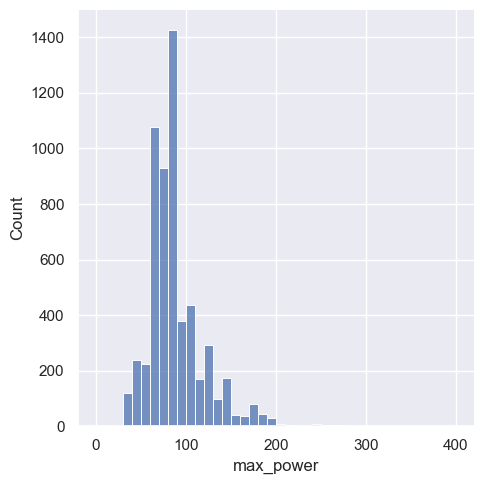

In [310]:
data = df_train['max_power']

sns.displot(data, binwidth = 10)

plt.show()

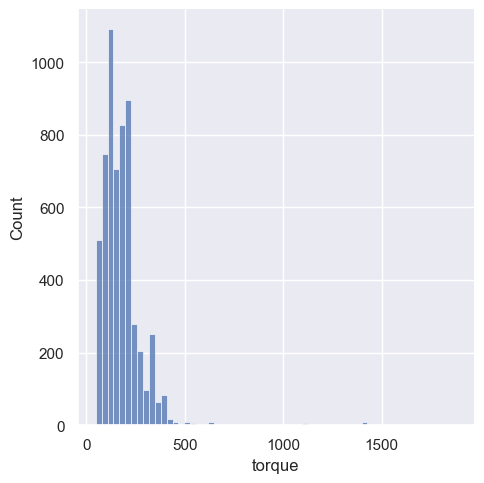

In [313]:
data = df_train['torque']

sns.displot(data, binwidth = 30)

plt.show()

In [531]:
lst_log = ['max_power', 'torque']
numeric_subset = df_train[lst_log]

for col in numeric_subset.columns:
    
    numeric_subset[col] = np.log(numeric_subset[col]+1)

else_subset = X_dum.drop(lst_log, axis=1)

df_train_w_logs = pd.concat([numeric_subset, else_subset], axis = 1)

C:\Users\HYPERPC\AppData\Local\Temp\ipykernel_3620\549821307.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_subset[col] = np.log(numeric_subset[col]+1)


In [533]:
df_test_log = df_test_upd.copy()

In [537]:
numeric_subset_test = df_test_upd[lst_log]
for col in lst_log:
    numeric_subset_test[col] = np.log(numeric_subset_test[col]+1)
    
else_subset_test = X_test_dum.drop(lst_log, axis=1)

df_test_w_logs = pd.concat([numeric_subset_test, else_subset_test], axis = 1)

C:\Users\HYPERPC\AppData\Local\Temp\ipykernel_3620\29076826.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_subset_test[col] = np.log(numeric_subset_test[col]+1)


In [532]:
df_train_w_logs

,max_power,torque,year,km_driven,mileage,engine,seats,max_torque,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,4.317488,5.252273,2014,145500,23.40,1248,5,2000,1,0,0,1,0,1,0,0,0,0
1,4.649378,5.525453,2014,120000,21.14,1498,5,2000,1,0,0,1,0,1,0,1,0,0
2,4.510860,5.396669,2010,127000,23.00,1396,5,2250,1,0,0,1,0,1,0,0,0,0
3,4.490881,4.734241,2007,120000,16.10,1298,5,4500,0,0,1,1,0,1,0,0,0,0
4,4.417152,4.742756,2017,45000,20.14,1197,5,4000,0,0,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,4.144721,4.575741,2008,191000,17.92,1086,5,3000,0,0,1,1,0,1,0,0,0,0
5836,4.220977,4.510860,2013,50000,18.90,998,5,3500,0,0,1,1,0,1,0,1,0,0
5837,4.429029,4.742320,2013,110000,18.50,1197,5,4000,0,0,1,1,0,1,0,0,0,0
5838,4.709530,5.465359,2007,119000,16.80,1493,5,2325,1,0,0,1,0,1,1,0,0,0


In [540]:
model_log = LinearRegression()
model_log.fit(df_train_w_logs, y_train)

y_train_log_pred = model_log.predict(df_train_w_logs)
y_test_log_pred = model_log.predict(df_test_w_logs)

rmse_train_log = np.sqrt(mean_squared_error(y_train, y_train_log_pred))
r2_train_log = r2_score(y_train, y_train_log_pred)

# evaluating the model on test dataset
rmse_test_log = np.sqrt(mean_squared_error(y_test, y_test_log_pred))
r2_test_log = r2_score(y_test, y_test_log_pred)

In [541]:
rmse_train_log, r2_train_log

(341959.1878748341, 0.5920431061597426)

In [542]:
rmse_test_log, r2_test_log

(501762.88341788546, 0.5620155110488522)

Качество не утешительное.

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [543]:
def business_metrics(y_true, y_pred):
    count = 0
    for i in range(len(y_true)):
        if y_true[i] * 0.9 <= y_pred[i] <= y_true[i] * 1.1:
            count += 1
    return '{} %'.format(count / len(y_test) * 100)

business_metrics(y_test, y_test_pred1)

'27.0 %'

# Часть 5 (3 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

#### Первая функция.
На вход через \docs поступают данные в словаре (json). На выход идет предсказание модели.

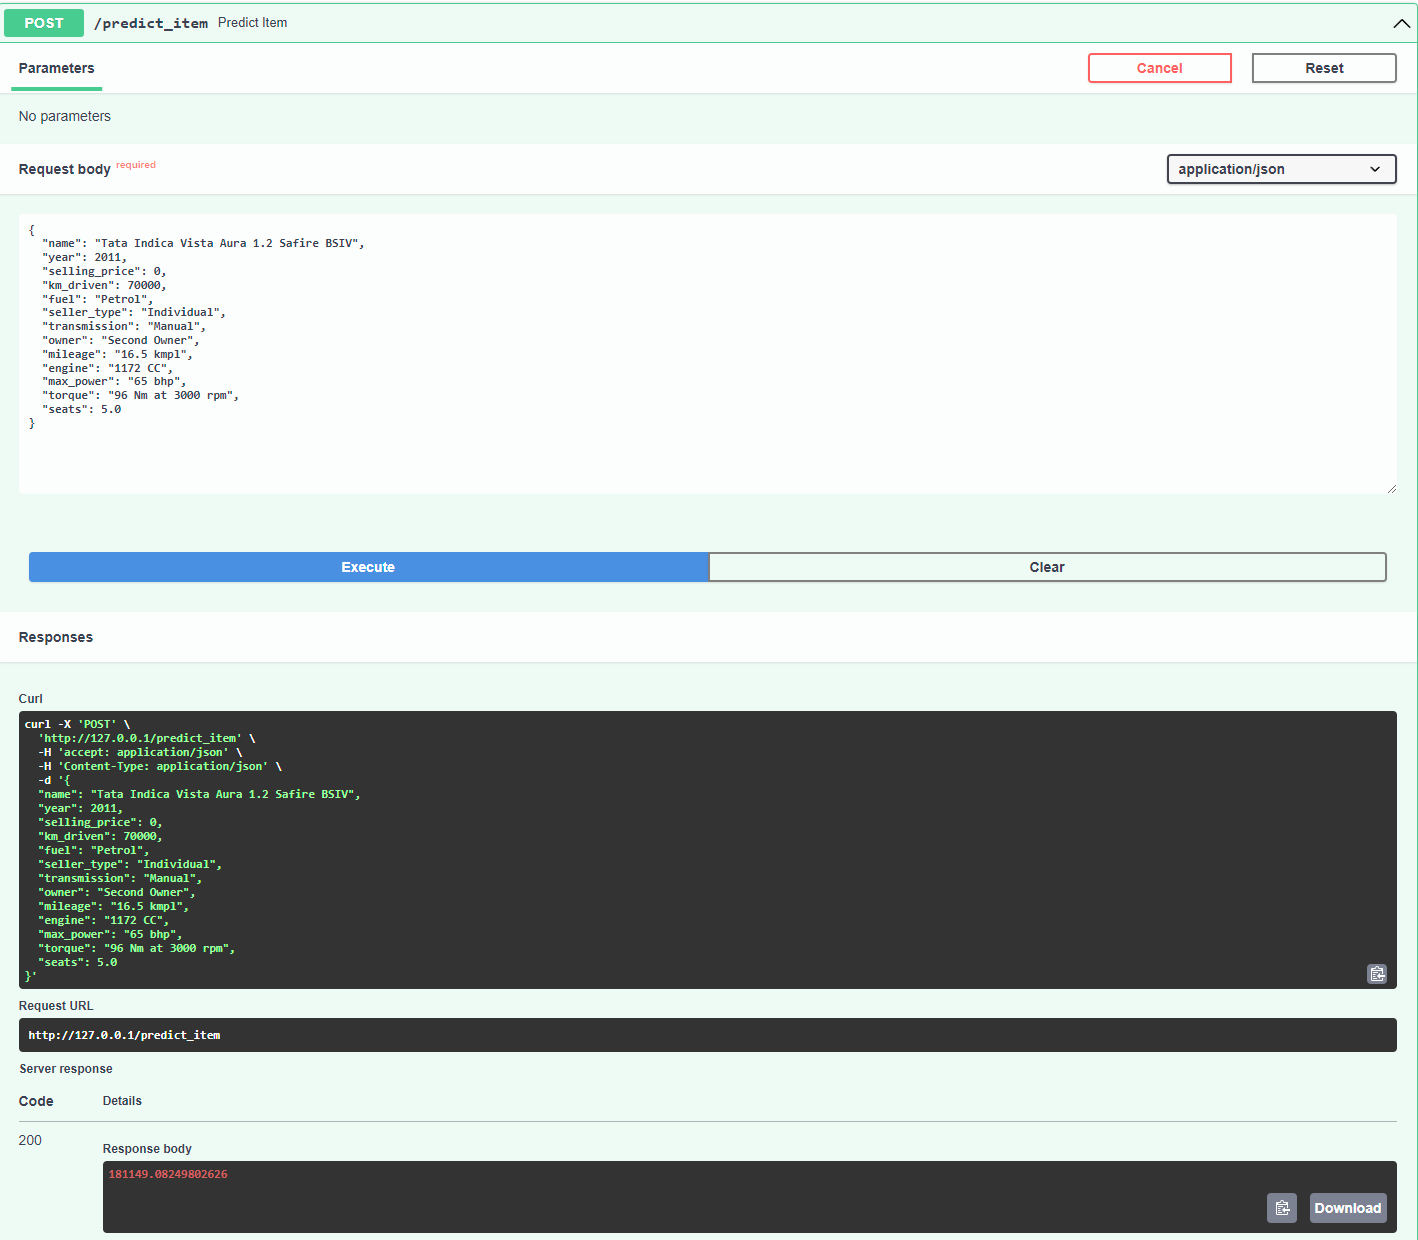

In [548]:
# Для сравнения вот предсказание модели в ноутбуке для пятого объекта
y_test_pred1[4]

181149.08249802713

#### Вторая функция.
Через \docs загружается .csv файл, на выход поступает список с предсказаниями.

Был выбран файл cars_test не из домашней директории проекта.

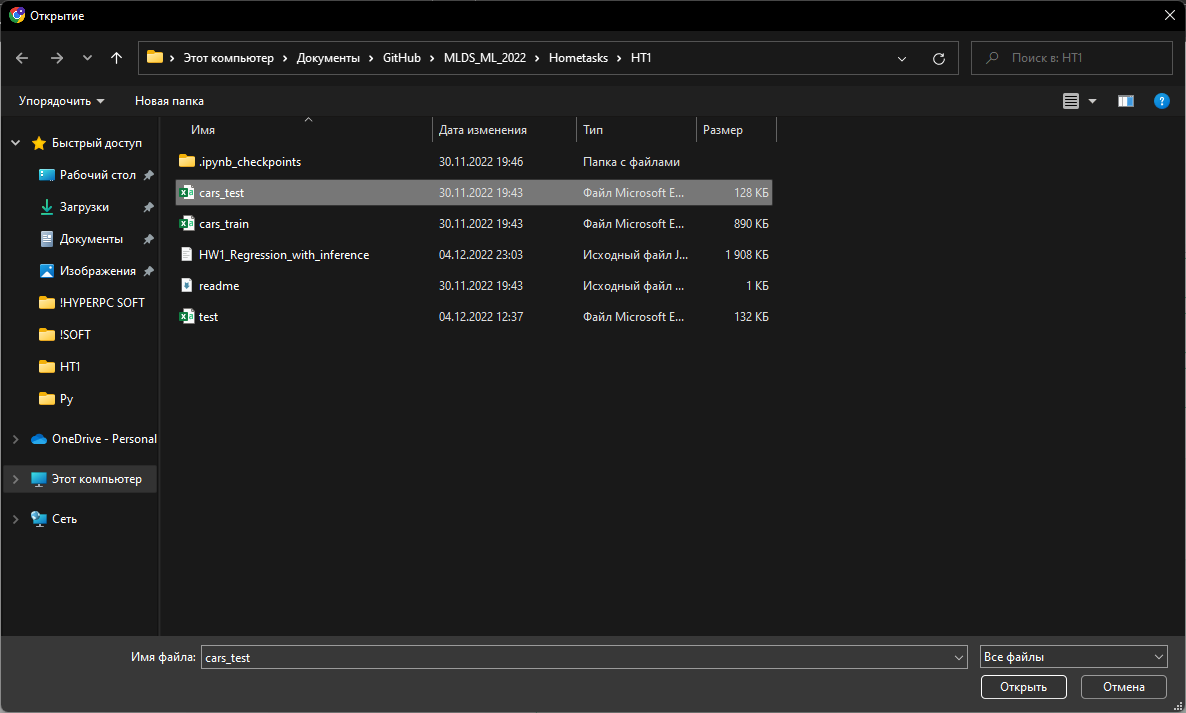

В результате на выход поступают предсказания модели в виде списка.

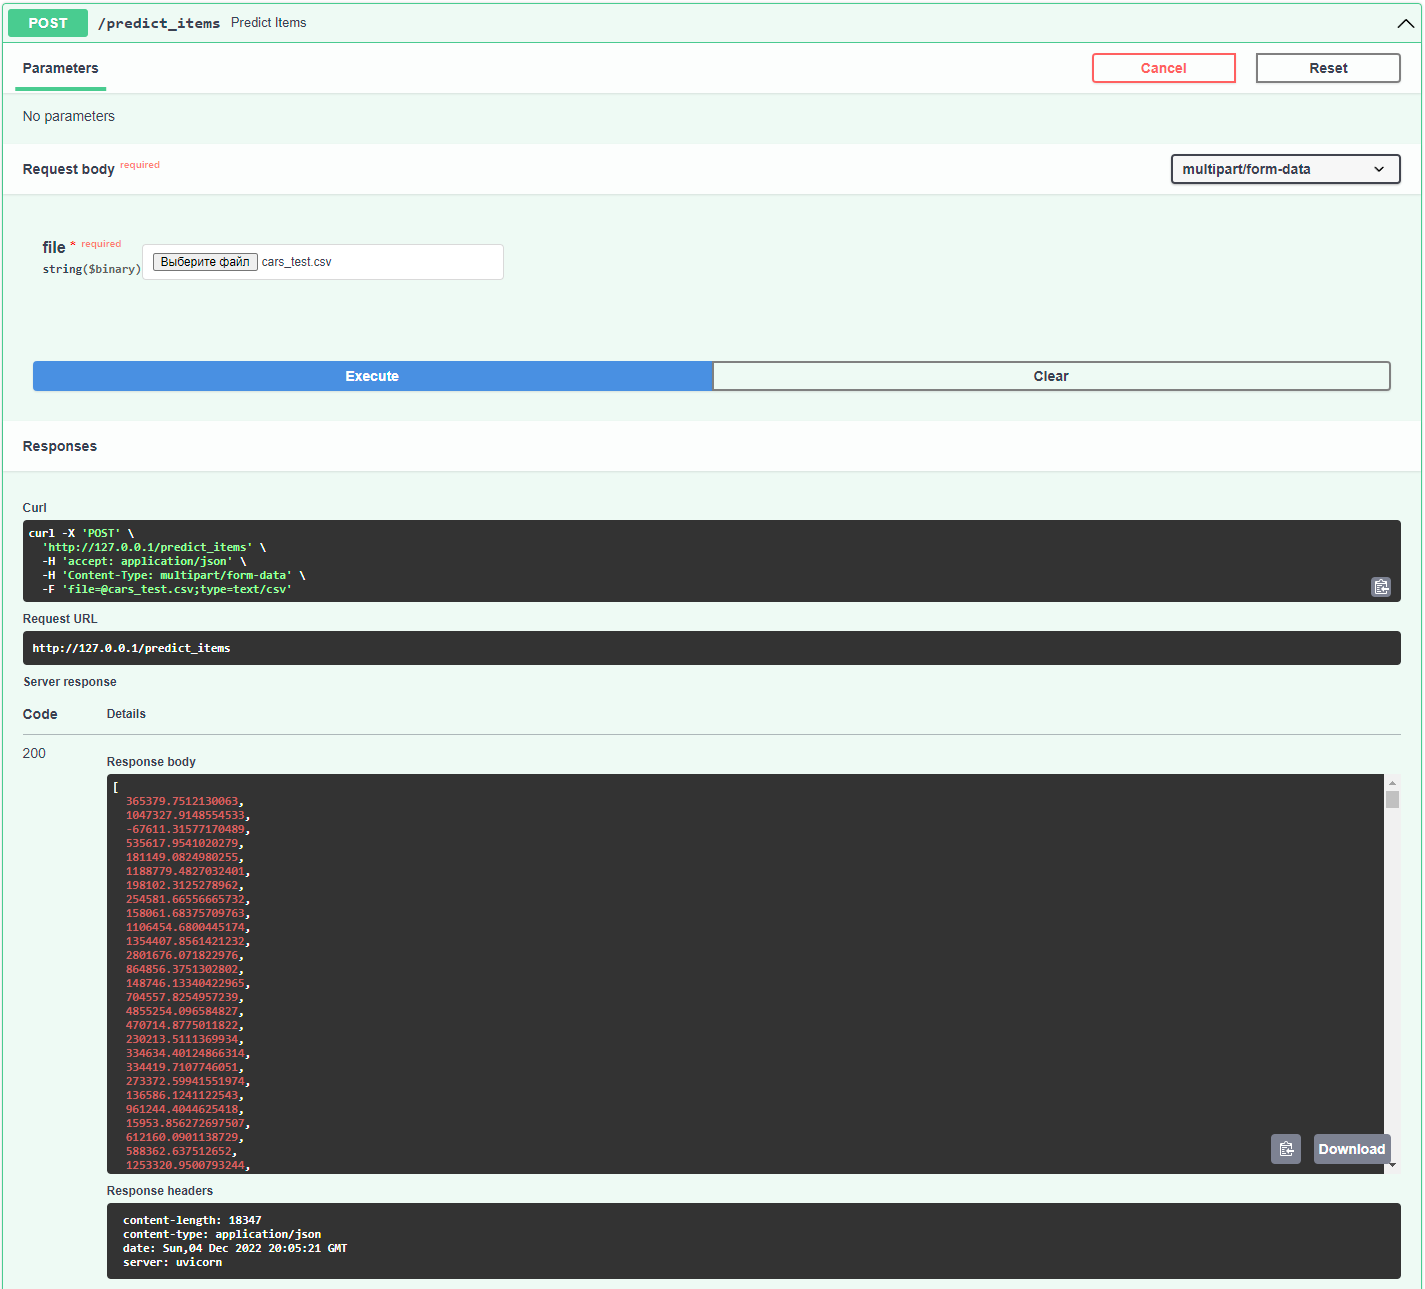

In [544]:
# Для сравнения вот предсказания модели в ноутбуке
y_test_pred1

array([ 3.65379751e+05,  1.04732791e+06, -6.76113158e+04,  5.35617954e+05,
        1.81149082e+05,  1.18877948e+06,  1.98102313e+05,  2.54581666e+05,
        1.58061684e+05,  1.10645468e+06,  1.35440786e+06,  2.80167607e+06,
        8.64856375e+05,  1.48746133e+05,  7.04557825e+05,  4.85525410e+06,
        4.70714878e+05,  2.30213511e+05,  3.34634401e+05,  3.34419711e+05,
        2.73372599e+05,  1.36586124e+05,  9.61244404e+05,  1.59538563e+04,
        6.12160090e+05,  5.88362638e+05,  1.25332095e+06,  9.46946453e+05,
        3.76626195e+05,  6.20260075e+05,  1.34584671e+06,  1.03737300e+06,
        6.03922663e+05,  5.00880527e+05,  2.62949967e+05,  2.35971493e+05,
        4.85572523e+05,  2.90746473e+05,  4.41753517e+05,  8.38998315e+05,
        2.77122472e+05,  3.16942379e+05,  2.40102851e+05,  3.70063657e+05,
        3.05658575e+05,  4.95562080e+05,  2.47767403e+05,  1.84435315e+05,
        5.37540400e+05,  7.26620814e+05,  1.80343678e+05,  1.76939477e+05,
        7.27724767e+05,  

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link